# 라이브러리 load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

## Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.

In [2]:
# df 컬럼명 리스트화
col = df.columns.tolist()

# 데이터 ->백만으로 변경
col[4] = "백만"

# df 컬럼명 변경
df.columns = col

#연도,분기 컬럼 추가
df["분기"] = df["시점"].map(lambda x: int(x.split('.')[1][0]))
df["연도"] = df["시점"].map(lambda x: int(x.split('.')[0]))

# '백만', 연도,분기에 대한 기술통계 구하기
df.describe().round(2)

,백만,분기,연도
count,2772.00,2772.00,2772.00
mean,1613.12,2.41,2019.27
std,4273.43,1.11,1.60
min,-10003.00,1.00,2017.00
25%,41.75,1.00,2018.00
50%,291.50,2.00,2019.00
75%,1181.00,3.00,2021.00
max,47689.00,4.00,2022.00


 ## Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

* 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
* pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [3]:
df_country_sale = df.pivot_table(index = "국가(대륙)별", columns="연도", values="백만", aggfunc = "sum")
df_country_sale 

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

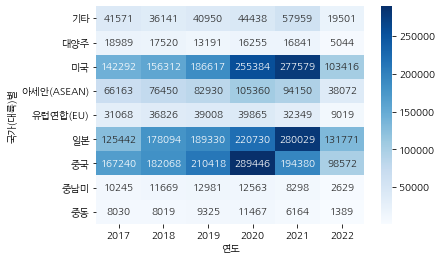

In [4]:
sns.heatmap(data =df_country_sale, cmap="Blues", annot=True, fmt=".0f")

## Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

* 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [5]:
df.loc[(df["국가(대륙)별"] == "미국") & (df["연도"]==2020), ["상품군별","백만"]].groupby("상품군별").sum().sort_values(by="백만", ascending=False).index[:4]

Index(['의류 및 패션 관련상품', '화장품', '기 타', '음반·비디오·악기'], dtype='object', name='상품군별')

<Figure size 1080x288 with 0 Axes>

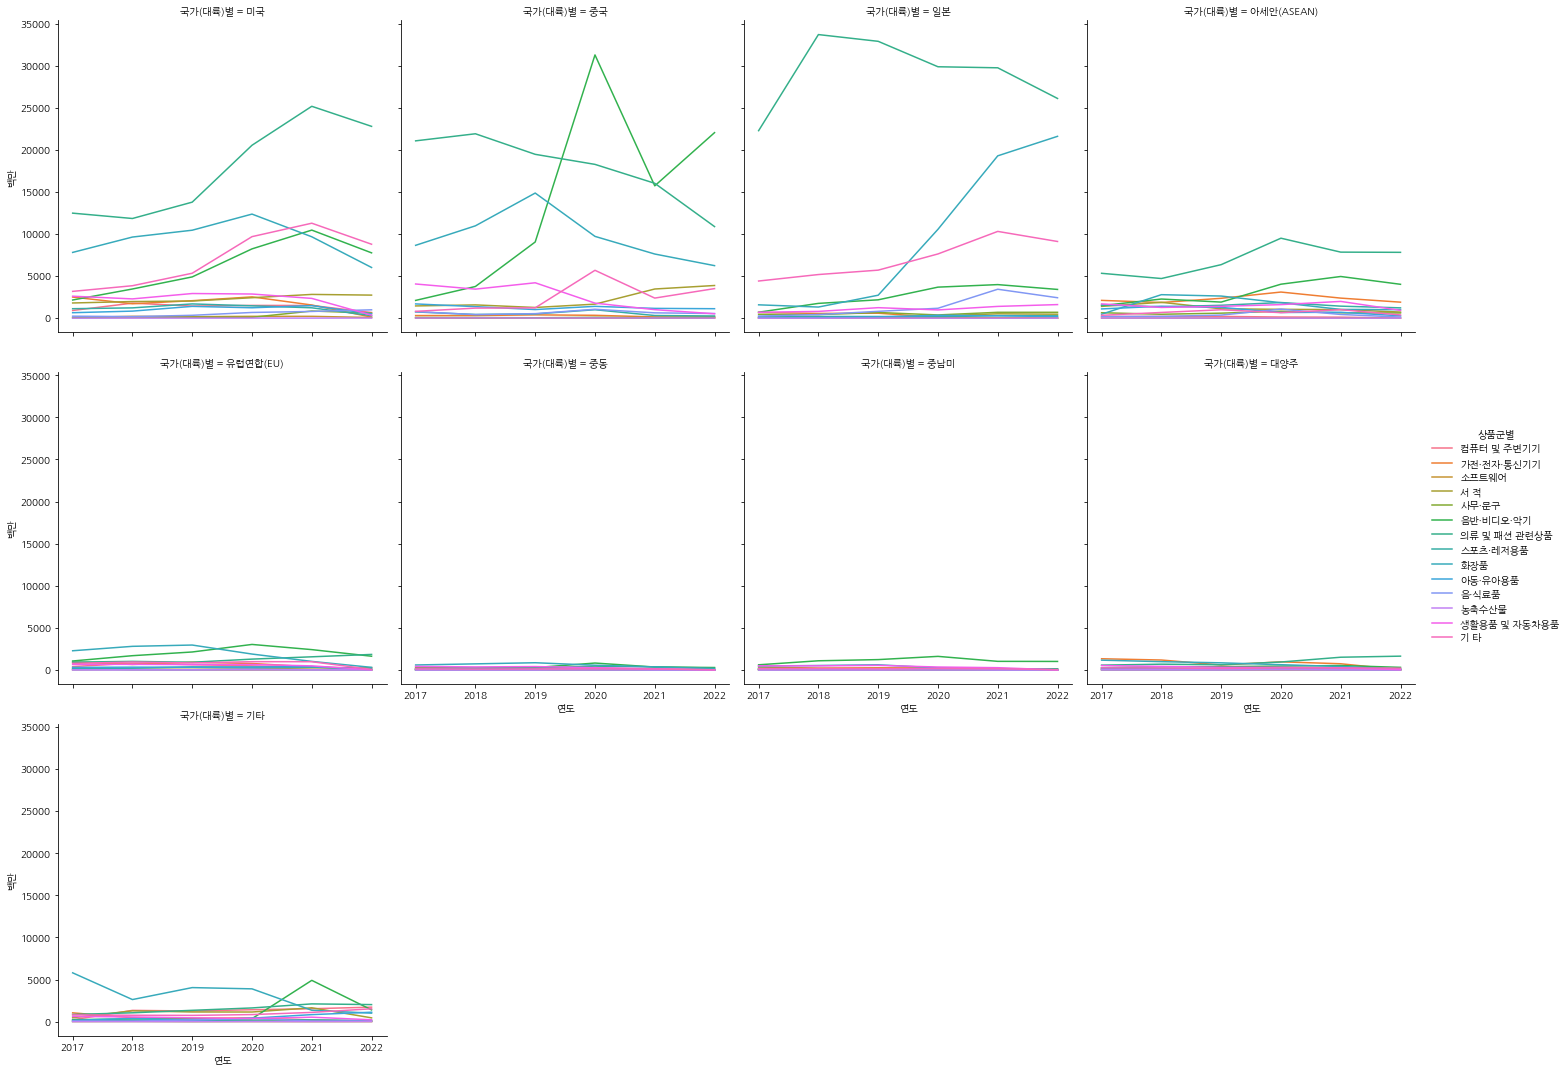

In [6]:
# 2020년 데이터만 따로 df_2020 변수에 담기
df_2020 = df[df["연도"] == 2020]

# 국가별 상푼군 판매액
df_2020[["국가(대륙)별","상품군별","백만"]].groupby(["국가(대륙)별","상품군별"]).sum()

plt.figure(figsize=(15,4))
sns.relplot(data=df, x="연도", y="백만", hue="상품군별", col="국가(대륙)별", col_wrap=4, kind="line", ci =None)

* 2020년 해외 판매에서 미국, 중국, 일본이 큰 비중을 차지함
* 미국의 경우 ['의류 및 패션 관련상품', '화장품', '음반·비디오·악기']가 2020년 주요 수출품
* 중국의 경우 ['음반·비디오·악기', '의류 및 패션 관련상품', '화장품']가 2020년 주요 수출품
* 일본의 경우 ['의류 및 패션 관련상품', '화장품', '음반·비디오·악기']가 2020년 주요 수출품
* 주요 출국인 미국, 중국, 일본에서 모두 '의류 및 패션 관련상품', '화장품', '음반·비디오·악기' 상품군이 높은 판매 비중을 차지함.
* 미국의 경우 2020년까지 3가지 주요 품목이 모두 증가함을 보여줌
* 중국의 경우 2020년까지 '음반·비디오·악기' 상품군에서 급격한 성장세를 보이며 나머지 두 주요 상품군은 판매량이 감소는 경향을 보임.
* 일본의 경우 '의류 및 패션 관련상품'군이 가장 큰 판매 비중을 차지하나 하락세를 보이고 있으며 나머지 두 주요 상품군은 상승세를 보임. 특히 화장품의 경우 가파른 성장률을 보임,

## Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요! 

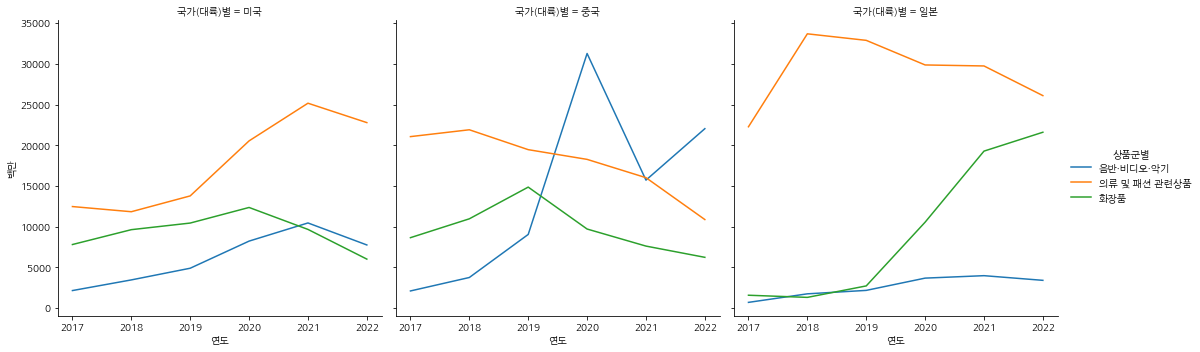

In [7]:
df_main = df[(df["국가(대륙)별"] == "미국")|(df["국가(대륙)별"] == "중국")|(df["국가(대륙)별"] == "일본")]
df_main = df_main[(df_main["상품군별"] == "의류 및 패션 관련상품")|(df_main["상품군별"] == "화장품")|
             (df_main["상품군별"] == "음반·비디오·악기")]

sns.relplot(data=df_main, x="연도", y="백만", hue="상품군별", col="국가(대륙)별",kind ="line", ci=None)

## Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

### SW기술자 평균임금 분석

* 평균임금이란? 
    + 근로기준법 제19조 1항에서는 "이법에서 평균임금이라 함은 이를 산정하여야 할 사유가 발생한 날 이전 3월간에 그 근로자에 대하여 지급된 임금의 총액을 그 기간의 총일수로 나눈 금액을 말한다"고 명시하고 있습니다.
    + 평균임금은 실제로 제공된 근로에 대하여 실제로 지급받은 임금의 1일 평균치를 말하는 것으로 퇴직금이나 업무상 재해에 따른 재해보상금 등을 산정할 때 기준으로 이용하는 임금 개념입니다

<AxesSubplot:xlabel='직무별', ylabel='월급'>

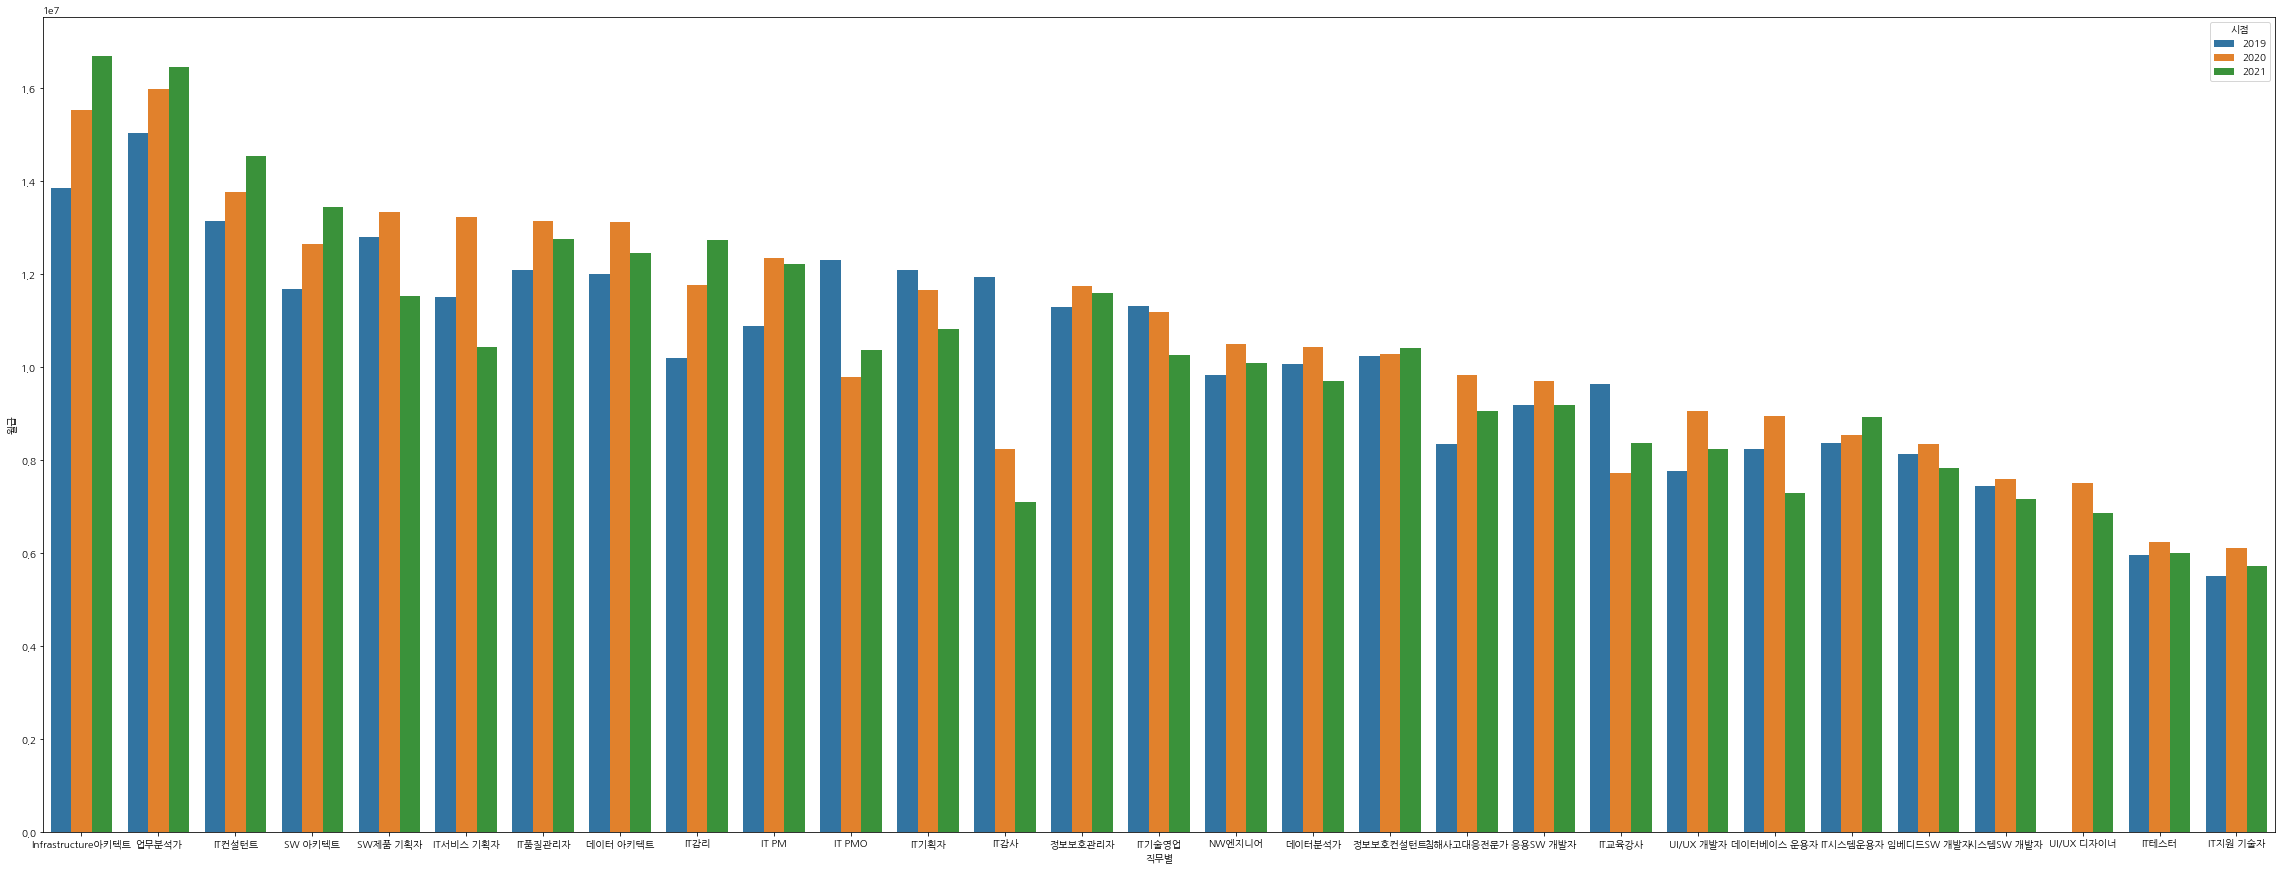

In [40]:
# 데이터 읽기
df = pd.read_csv("SW기술자_평균임금_20221121154714.csv", encoding="cp949")

# 평균임금 월급으로 변경
df["데이터"] = df["데이터"].map(lambda x: float(x)*30)

# 데이터 컬럼명 월급으로 변경
df = df.rename(columns = {'데이터':'월급'})

#시각화
plt.figure(figsize=(40,15))
sns.barplot(data=df.sort_values(by="월급", ascending= False), x="직무별", y="월급",hue ="시점")

In [68]:
# NaN 값 0으로 치환
df_year = df.pivot_table(index ="직무별", columns="시점", values="월급")
df_year.fillna(0,inplace=True)

# 성장률 컬럼 더하기
for i in df_year:
    if i != 2019:
        df_year[str(i)+"성장률"] = df_year[i]/df_year[i-1]
        if i == 2020:
            df_year.loc["UI/UX 디자이너","2020성장률"] = 0
        df_year[str(i)+"성장률"] = df_year[str(i)+"성장률"].map(lambda x : str(int((x-1)*100))+"%")

# 성장률에 NaN 값 0 으로 바꾸기
df_year.loc["UI/UX 디자이너","2020성장률"] = 0

In [78]:
# 2021년 월급을 기준으로 정렬하기
df_year.sort_values(by = 2021,ascending =False)

시점,2019,2020,2021,2020성장률,2021성장률
직무별,,,,,
Infrastructure아키텍트,13850520.0,15526170.0,16695360.0,12%,7%
업무분석가,15032700.0,15967290.0,16456500.0,6%,3%
IT컨설턴트,13137000.0,13764540.0,14541960.0,4%,5%
SW 아키텍트,11673120.0,12652830.0,13447200.0,8%,6%
IT품질관리자,12076620.0,13149120.0,12743400.0,8%,-3%
IT감리,10203270.0,11752230.0,12734430.0,15%,8%
데이터 아키텍트,11999550.0,13111890.0,12443100.0,9%,-5%
IT PM,10883400.0,12339870.0,12204690.0,13%,-1%
정보보호관리자,11295870.0,11751750.0,11583420.0,4%,-1%


* 'Infrastructure아키텍트', '업무분석가', 'IT컨설턴트', 'SW 아키텍트' 직업이 임금이 가장 높으며 임금 성장률도 높은 수치를 보임
* 'IT 감리' 직업은 높은 임금 성장률을 보여 추후 유망할 직군으로 보임.